In [1]:
# uniquement pour utliser dans colab : 

# !git clone https://github.com/CarinePivoteau/Alea2023Notebooks.git
# import sys
# sys.path.append('/content/Alea2023Notebooks')

In [2]:
# si les modules ne sont pas installés :

# import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install graphviz

In [3]:
# imports : random, time, math, sys, plt, graphviz

from helpers import *
from gen_laws import *

In [4]:
C,M = {},{}

x = 0.3
xValues = [x]
C[x] = 0.7350304124
M[x] = 0.5205091237

x = 0.31
xValues.append(x)
C[x] = 0.8579057555
M[x] = 0.5759507842

x = 0.3178444328
xValues.append(x)
C[x] = 1.146156588
M[x] = 0.6821439234

x = 0.3178444328993726
xValues.append(x)
C[x] = 1.1461931869733617481
M[x] = 0.68215555640604531063



In [5]:
def random_mobile_free(x, maxi): # M = Z + Z x C,  C = Cyc(M)
    size = 0
    def sizeUP():
        nonlocal size, maxi # compteur global
        size += 1
        if size > maxi:
            raise Exception("Too large")   
    def genM():
        u = random.random()
        sizeUP()
        if u < x/(M[x]):
            return ['Z']
        else: return ['Z'] + genC()
    def genC():
        k = loga(M[x])
        return [genM() for i in range(k)]
    
    try:
        return genM(), size
    except Exception as err:
        #print(err)
        return None, 0 

In [6]:
c, size = random_mobile_free(xValues[1],1000)
print(c, size)

['Z'] 1


In [7]:
def random_mobile(x, n):
    return gen_random_fixed_size(random_mobile_free, x, n)

def random_mobile_approx(x, mini, maxi):
    return gen_random_approx_size(random_mobile_free, x, mini, maxi)

In [8]:
nb_trials,size_trials,mobile,size = random_mobile_approx(xValues[1],200,300)
print(nb_trials,size_trials,mobile,size)

..................................................................................................................................................................................................................................................................................................................
30692 114771 ['Z', ['Z', ['Z'], ['Z', ['Z'], ['Z', ['Z']], ['Z'], ['Z', ['Z'], ['Z', ['Z', ['Z', ['Z'], ['Z']]], ['Z', ['Z', ['Z', ['Z']]], ['Z']], ['Z', ['Z']], ['Z', ['Z', ['Z'], ['Z', ['Z']]]]], ['Z']], ['Z']], ['Z', ['Z', ['Z'], ['Z'], ['Z', ['Z', ['Z', ['Z', ['Z', ['Z']], ['Z'], ['Z']], ['Z']], ['Z'], ['Z']]], ['Z'], ['Z', ['Z'], ['Z', ['Z']], ['Z'], ['Z', ['Z', ['Z', ['Z', ['Z']], ['Z', ['Z'], ['Z', ['Z', ['Z', ['Z', ['Z', ['Z', ['Z', ['Z'], ['Z'], ['Z']], ['Z', ['Z']], ['Z', ['Z', ['Z'], ['Z']], ['Z', ['Z'], ['Z']]]], ['Z']]], ['Z', ['Z']]]]], ['Z', ['Z']], ['Z'], ['Z', ['Z'], ['Z', ['Z', ['Z', ['Z']]], ['Z'], ['Z'], ['Z', ['Z', ['Z', ['Z']], ['Z', ['Z']]], ['Z']], ['Z', ['Z', 

In [9]:
def label(m,s):
    p = random_permutation(s)
    def label(t):
        if t == ['Z']:
            return [p.pop()]
        return [p.pop()] + sorted([label(tt) for tt in t[1:]])  # tri pour imposer l'ordre d'affichage
    return label(m)

In [10]:
dico = count_occurences(lambda : label(random_mobile(xValues[0],3)[2],3), 100_000) 

nb: 9
[2, [1], [3]] 11.03
[1, [3, [2]]] 11.04
[3, [1], [2]] 11.27
[3, [1, [2]]] 11.18
[2, [1, [3]]] 11.18
[1, [2, [3]]] 11.17
[3, [2, [1]]] 10.84
[1, [2], [3]] 11.32
[2, [3, [1]]] 10.98


In [11]:
import sys
sys.setrecursionlimit(100000)

In [12]:
nb_trials,size_trials,mobile,size = random_mobile_approx(xValues[2],100_000,200_000)
print(nb_trials,size_trials,size)

...........................
2741 520341 105759


In [13]:
nb_trials,size_trials,mobile,size = random_mobile_approx(xValues[2],500_000,1_000_000)
print(nb_trials,size_trials,size)

........................................
4059 2213383 980835


In [14]:
nb_trials,size_trials,mobile,size = random_mobile_approx(xValues[3],500_000,1_000_000)
print(nb_trials,size_trials,size)

........................................................
5683 2159093 550742


In [15]:
nb_trials,size_trials,mobile,size = random_mobile_approx(xValues[2],10000,15000)
print(nb_trials,size_trials,size)

.....
513 31108 10200


In [16]:
draw_tree_unlabelled(mobile,5,20)

## Non étiquetés

In [17]:
MU = {}

x = 0.3
xValuesU = [x]
MU[x] = [None, 0.59322964268702006051, 0.099887380769816277347, 0.027770629225041986722, 0.0081666904202666832790, 0.0024359337380520792839, 0.00072953221697255217360, 0.00021874785061986162801, 0.000065614305237033204713, 0.000019683387435740795375, 5.9049348682557971273*10**(-6), 1.7714731381170790605*10**(-6), 5.3144128242983667059*10**(-7), 1.5943232541866638840*10**(-7), 4.7829692287679464334*10**(-8), 1.4348907205891138003*10**(-8), 4.3046721185302020481*10**(-9), 1.2914016316677181743*10**(-9), 3.8742048915009463541*10**(-10), 1.1622614671350851718*10**(-10), 3.4867844011215766546*10**(-11)]

x = 0.306
xValuesU.append(x)
MU[x] = [None, 0.67677193840682144895, 0.10443562990101919392, 0.029523516144336760902, 0.0088459451725310908770, 0.0026901532239115671322, 0.00082164750781516278374, 0.00025128069749984763675, 0.000076878482288562709893, 0.000023523560386085877312, 7.1980919631549487297*10**(-6), 2.2026051375612666495*10**(-6), 6.7399614181491282768*10**(-7), 2.0624272292455953516*10**(-7), 6.3110264181786070499*10**(-8), 1.9311739993800772962*10**(-8), 5.9093923589033042918*10**(-9), 1.8082740544084652453*10**(-9), 5.5333185995459086524*10**(-10), 1.6931954908108401341*10**(-10), 5.1811782012723421290*10**(-11)]

x = 0.3061875165
xValuesU.append(x)
MU[x] = [None, 0.69380468884057178027, 0.10458002897975103375, 0.029579528225111350683, 0.0088678441420351818518, 0.0026984283380783479587, 0.00082467566782891592769, 0.00025236084572945517658, 0.000077256209281728943566, 0.000023653618860983306344, 7.2423239565564469743*10**(-6), 2.2174980433241440916*10**(-6), 6.7896917411303697983*10**(-7), 2.0789178726854049668*10**(-7), 6.3653860863197925939*10**(-8), 1.9490016712585003814*10**(-8), 5.9675997330735230826*10**(-9), 1.8272045341704960187*10**(-9), 5.5946721774594609300*10**(-10), 1.7130187789830251047*10**(-10), 5.2450496559233671277*10**(-11)]

In [18]:
x = xValuesU[2]
values = MU[x]
print(values[1]) # M(x^1)
print(values[2]) # M(x^2)

0.6938046888405718
0.10458002897975104


In [19]:
# import sys 
# !{sys.executable} -m pip install sympy

from sympy.ntheory.factor_ import totient as phi

In [20]:
def random_mobileU_free(x, maxi): # M = Z + Z x Cyc(M)
    values = MU[x]
    
    def genM(t): # param : x^t
        u = random.random()
        if u < x**t/(values[t]):
            return ['Z'], 1
        else: 
            tmp,s = genC(t)
            return ['Z'] + tmp, s+1
    
    def symetry_order(t): # param : x^t
        u = random.random()
        k = 1
        p = math.log(1/(1-values[t]))
        while p*x**t/(values[t]-x**t) < u:
            k += 1
            p += phi(k)/k*math.log(1/(1-values[t*k]))
        return k

    def genC(t): # param : x^t
        k = symetry_order(t)
        pattern_len = loga(values[t*k])
        res, size = [], 0
        for i in range(pattern_len):
            tmp,s = genM(k*t)
            size += s*k
            if size > maxi:
                raise Exception("Too large " + str(size)) 
            res.append(tmp)
        return [t for _ in range(k) for t in res], size

    try:
        return genM(1)
    except Exception as err:
        #print("---", err)
        return None, 0 
        

In [21]:
gf, size = random_mobileU_free(xValuesU[2],10000)
print(gf, size)

['Z'] 1


In [22]:
def random_mobileU(x, n):
    return gen_random_fixed_size(random_mobileU_free, x, n)

def random_mobileU_approx(x, mini, maxi):
    return gen_random_approx_size(random_mobileU_free, x, mini, maxi)

In [23]:
dico = count_occurences(lambda : random_mobileU(xValuesU[0],3)[2], 100_000) 

nb: 2
['Z', ['Z', ['Z']]] 49.95
['Z', ['Z'], ['Z']] 50.05


In [24]:
dico = count_occurences(lambda : random_mobileU(xValuesU[0],4)[2], 100_000) 

nb: 5
['Z', ['Z', ['Z'], ['Z']]] 25.11
['Z', ['Z'], ['Z'], ['Z']] 24.92
['Z', ['Z'], ['Z', ['Z']]] 12.61
['Z', ['Z', ['Z']], ['Z']] 12.58
['Z', ['Z', ['Z', ['Z']]]] 24.78


In [25]:
nb_trials,size_trials,mobile,size = random_mobileU_approx(xValuesU[1],200,300)
print(nb_trials,size_trials,mobile,size)

...
347 2679 ['Z', ['Z', ['Z', ['Z'], ['Z']]], ['Z', ['Z'], ['Z'], ['Z'], ['Z', ['Z'], ['Z', ['Z', ['Z']], ['Z', ['Z'], ['Z', ['Z', ['Z']]]], ['Z'], ['Z'], ['Z', ['Z']], ['Z', ['Z', ['Z', ['Z', ['Z']], ['Z']], ['Z', ['Z', ['Z', ['Z', ['Z']], ['Z']], ['Z', ['Z', ['Z'], ['Z', ['Z', ['Z', ['Z', ['Z'], ['Z', ['Z', ['Z']], ['Z'], ['Z']]]]]], ['Z', ['Z']], ['Z'], ['Z', ['Z', ['Z', ['Z', ['Z']]]]], ['Z'], ['Z', ['Z'], ['Z']]]]], ['Z', ['Z', ['Z'], ['Z', ['Z', ['Z', ['Z', ['Z'], ['Z', ['Z', ['Z']]], ['Z'], ['Z', ['Z'], ['Z']], ['Z', ['Z', ['Z'], ['Z', ['Z']]], ['Z', ['Z']]]]]], ['Z']], ['Z', ['Z']]]], ['Z', ['Z', ['Z', ['Z', ['Z', ['Z', ['Z', ['Z', ['Z', ['Z', ['Z'], ['Z'], ['Z', ['Z'], ['Z'], ['Z']], ['Z', ['Z']]]], ['Z']], ['Z', ['Z', ['Z', ['Z']]]]]]]]], ['Z', ['Z', ['Z', ['Z', ['Z']]]]]], ['Z', ['Z'], ['Z', ['Z', ['Z']]]], ['Z']], ['Z'], ['Z', ['Z'], ['Z']], ['Z']], ['Z', ['Z'], ['Z'], ['Z', ['Z', ['Z', ['Z'], ['Z', ['Z']]]]], ['Z', ['Z'], ['Z'], ['Z']]], ['Z'], ['Z']]], ['Z', ['Z', ['Z'],

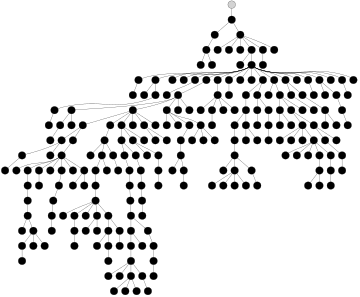

In [26]:
draw_tree_unlabelled(mobile,5,20)

In [27]:
import sys
sys.setrecursionlimit(100000)
nb_trials,size_trials,graphe,size = random_mobileU_approx(xValuesU[2],500_000,1_000_000)
print(nb_trials,size_trials,size)

......................................................................................
8698 4364692 857939


In [28]:
n = 10_000
l = counts_max_and_average(lambda : random_mobileU_free(xValuesU[0],1000)[1], n)

trop grands = 0, taille max = 213, moyenne des tailles = 4.2323


In [29]:
l2 = counts_max_and_average(lambda : random_mobileU_free(xValuesU[2],1000)[1], n)

trop grands = 166, taille max = 988, moyenne des tailles = 16.7768


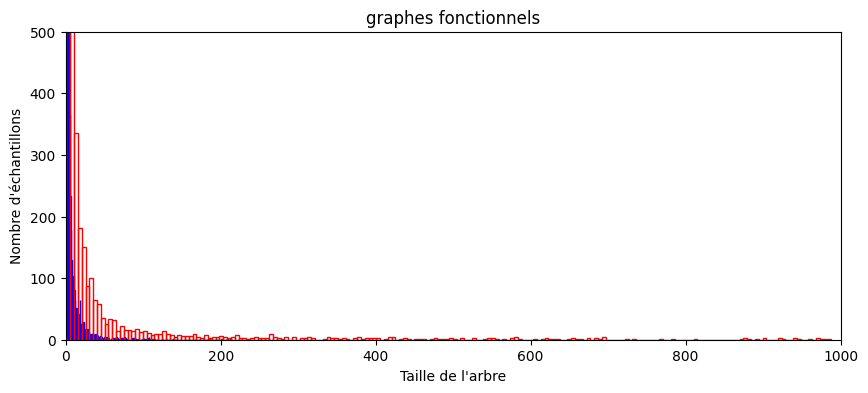

<Figure size 2000x400 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4]

plt.hist(l,bins=200, ec="blue",fill=False) # x = 0.3
plt.hist(l2,bins=200, ec="red", fill=False) # x = 0.3061875165
plt.title("graphes fonctionnels")
plt.xlabel("Taille de l'arbre")
plt.ylabel("Nombre d'échantillons")
plt.axis([0, 1000, 0, 500])
f = plt.figure()
f.set_figwidth(20)
plt.show()